In [1]:
from azure_utils import KeyVault, DataLake
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
# ! python -m pip install lightkurve --upgrade

In [3]:
vault = KeyVault(keyVaultName = "keyvaultdva2022")
storage_credential = vault.get_secret(secretName = "storagePrimaryKey")

In [4]:
# Connect to storage:
storage = DataLake(account_name = "storageaccountdva", credential = storage_credential)

In [5]:
filepath = "C:/Users/phuon/Documents/Projects/Exoplanet/exonet_inputs/exonet_inputs/train_centroids/"

In [6]:
local_v = "kplr_000757450_01_local_cen_w.npy"
global_v = "kplr_000757450_01_global_cen_w.npy"

In [7]:
def plot_lightcurve(filepath, name):
    data = np.load(filepath+name)
    plt.plot(data)

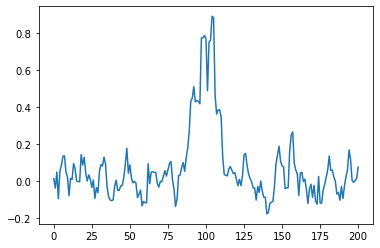

In [8]:
plot_lightcurve(filepath=filepath, name=local_v)

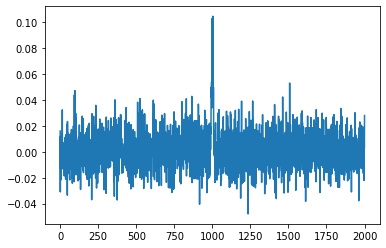

In [9]:
plot_lightcurve(filepath=filepath, name=global_v)

In [10]:
# Search lightcurves of KIC 757450:
search_result = lk.search_lightcurve("KIC 757450", author="Kepler", cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr000757450,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr000757450,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr000757450,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr000757450,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr000757450,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr000757450,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr000757450,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr000757450,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr000757450,0.0


In [17]:
lcs = search_result.download_all()
lcs

LightCurveCollection of 17 objects:
    0: <KeplerLightCurve LABEL="KIC 757450" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 757450" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 757450" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 757450" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 757450" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 757450" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 757450" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 757450" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 757450" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 757450" QUARTER=10 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <KeplerLightCurve LABEL="

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

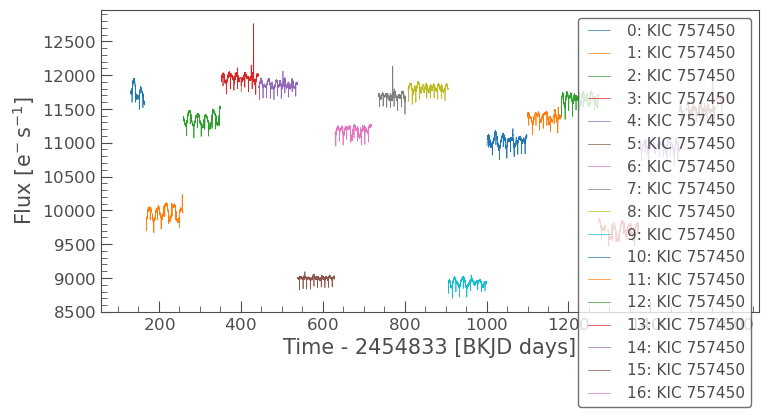

In [18]:
lcs.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

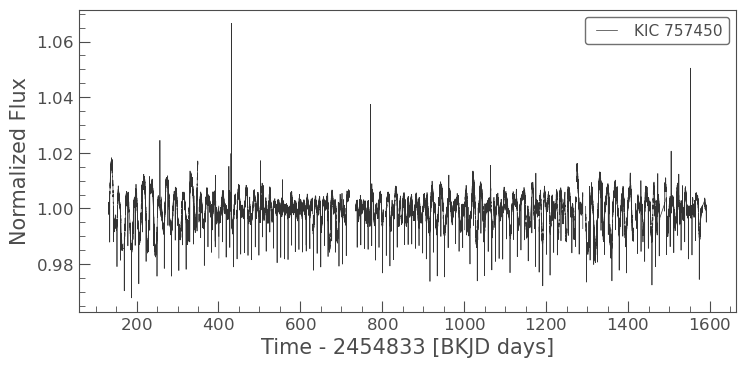

In [19]:
lc_raw = lcs.stitch()
lc_raw.plot()

In [20]:
lc_raw.flux.shape

(65031,)